<a href="https://colab.research.google.com/github/ADVAIT135/CDAC/blob/main/3.%20AI%20TRENDS/ASSIGNMENT%204/CDAC_PGDAI_AI_TRENDS_ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> Name : </u> ADVAIT GURUNATH CHAVAN
# <u> Email ID : </u> advaitchavan135@gmail.com
# CDAC PGDAI AI TRENDS ASSIGNMENT 4

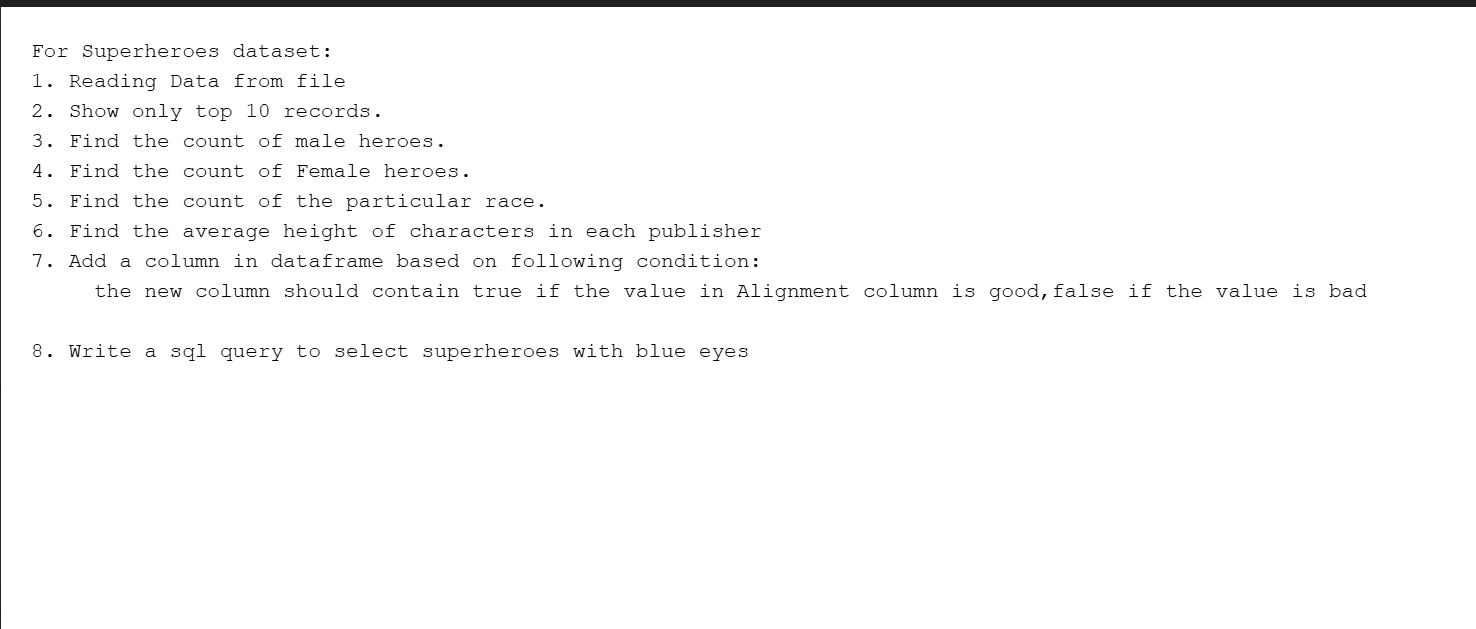

In [1]:
!pip install pyspark

In [2]:
!pip install -U -q PyDrive

In [3]:
!apt install openjdk-8-jdk-headless -qq

The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u452-ga~us1-0ubuntu1~22.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u452-ga~us1-0

In [4]:
import os

In [5]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [6]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

In [7]:
conf = SparkConf().set("spark.ui.port", "4050")

In [8]:
import pyspark
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

## 1. Reading Data from file

In [9]:
df = spark.read.csv("/content/heroes_information.csv", header=True, inferSchema=True)

In [11]:
df

DataFrame[Id: int, Name: string, Gender: string, Eyecolor: string, Race: string, Haircolor: string, Height: double, Publisher: string, Skincolor: string, Alignment: string, Weight: int]

## 2. Show only top 10 records.

In [12]:
df.show(10)


+---+-------------+------+--------+-----------------+---------+------+-----------------+---------+---------+------+
| Id|         Name|Gender|Eyecolor|             Race|Haircolor|Height|        Publisher|Skincolor|Alignment|Weight|
+---+-------------+------+--------+-----------------+---------+------+-----------------+---------+---------+------+
|  0|       A-Bomb|  Male|  yellow|            Human|  No Hair| 203.0|    Marvel Comics|        -|     good|   441|
|  1|   Abe Sapien|  Male|    blue|    Icthyo Sapien|  No Hair| 191.0|Dark Horse Comics|     blue|     good|    65|
|  2|     Abin Sur|  Male|    blue|          Ungaran|  No Hair| 185.0|        DC Comics|      red|     good|    90|
|  3|  Abomination|  Male|   green|Human / Radiation|  No Hair| 203.0|    Marvel Comics|        -|      bad|   441|
|  4|      Abraxas|  Male|    blue|    Cosmic Entity|    Black| -99.0|    Marvel Comics|        -|      bad|   -99|
|  5|Absorbing Man|  Male|    blue|            Human|  No Hair| 193.0|  

## 3. Find the count of male heroes.

In [13]:
male_count = df.filter(df.Gender == "Male").count()
print("Male Heroes Count:", male_count)

Male Heroes Count: 505


## 4. Find the count of Female heroes.

In [14]:
female_count = df.filter(df.Gender == "Female").count()
print("Female Heroes Count:", female_count)


Female Heroes Count: 200


## 5. Find the count of the particular race.

In [38]:
df.groupBy("Race").count().show(300)

+------------------+-----+
|              Race|count|
+------------------+-----+
|          Neyaphem|    1|
|          Symbiote|    9|
|        Kryptonian|    7|
|           Ungaran|    1|
|           Martian|    1|
|         Strontian|    1|
| Human / Radiation|   11|
|   Kakarantharaian|    1|
|         Metahuman|    2|
|Dathomirian Zabrak|    1|
|    Human / Cosmic|    2|
|   Xenomorph XX121|    1|
|            Animal|    4|
|       Frost Giant|    2|
|            Cyborg|   11|
|           Inhuman|    4|
|     God / Eternal|   14|
|    Yoda's species|    1|
|     Icthyo Sapien|    1|
|            Rodian|    1|
|        Bolovaxian|    1|
|   Human / Altered|    3|
|     Cosmic Entity|    4|
|           Spartoi|    1|
|           Vampire|    2|
|     Human / Clone|    1|
|                 -|  304|
|         Korugaran|    1|
|          Czarnian|    1|
|             Demon|    6|
|         Asgardian|    5|
|     Zen-Whoberian|    1|
|           Eternal|    2|
|         Luphomoid|    1|
|

## 6. Find the average height of characters in each publisher

In [40]:
from pyspark.sql.functions import avg

df.groupBy("Publisher").agg(avg("Height").alias("avg_height")).show(75)

+-----------------+-------------------+
|        Publisher|         avg_height|
+-----------------+-------------------+
|        Rebellion|              188.0|
|    HarperCollins|              -99.0|
| J. R. R. Tolkien|              279.0|
|        Star Trek|               -5.5|
|    Marvel Comics| 142.75644329896906|
|        Wildstorm|              -99.0|
|             NULL|-2.3666666666666667|
|       South Park|              -99.0|
|    Sony Pictures|              179.0|
|      Titan Books|              183.0|
|      ABC Studios|              -99.0|
|             SyFy|              -99.0|
|     Image Comics| -76.85714285714286|
|Universal Studios|              -99.0|
|   IDW Publishing|              -99.0|
|     NBC - Heroes|              -99.0|
|    Hanna-Barbera|              -99.0|
|        DC Comics|  91.07209302325582|
|        Microsoft|              213.0|
|    J. K. Rowling|              -99.0|
|      Icon Comics|              -99.0|
|Dark Horse Comics|  69.61111111111111|


## 7. Add a column in dataframe based on following condition: the new column should contain true if the value in Alignment column is good,false if the value is bad

In [41]:
from pyspark.sql.functions import when

df = df.withColumn("is_good",
                   when(df.Alignment == "good", True)
                   .when(df.Alignment == "bad", False)
                   .otherwise(None))
df.show(75)


+---+-----------------+------+--------+-----------------+----------------+------+-----------------+---------+---------+------+-------+
| Id|             Name|Gender|Eyecolor|             Race|       Haircolor|Height|        Publisher|Skincolor|Alignment|Weight|is_good|
+---+-----------------+------+--------+-----------------+----------------+------+-----------------+---------+---------+------+-------+
|  0|           A-Bomb|  Male|  yellow|            Human|         No Hair| 203.0|    Marvel Comics|        -|     good|   441|   true|
|  1|       Abe Sapien|  Male|    blue|    Icthyo Sapien|         No Hair| 191.0|Dark Horse Comics|     blue|     good|    65|   true|
|  2|         Abin Sur|  Male|    blue|          Ungaran|         No Hair| 185.0|        DC Comics|      red|     good|    90|   true|
|  3|      Abomination|  Male|   green|Human / Radiation|         No Hair| 203.0|    Marvel Comics|        -|      bad|   441|  false|
|  4|          Abraxas|  Male|    blue|    Cosmic Entit

## 8. Write a sql query to select superheroes with blue eyes

In [44]:

df.createOrReplaceTempView("superheroes")


blue_eyed_df = spark.sql("SELECT * FROM superheroes WHERE EyeColor = 'blue'")
blue_eyed_df.show(100)


+---+-----------------+------+--------+-----------------+----------------+------+-----------------+---------+---------+------+-------+
| Id|             Name|Gender|Eyecolor|             Race|       Haircolor|Height|        Publisher|Skincolor|Alignment|Weight|is_good|
+---+-----------------+------+--------+-----------------+----------------+------+-----------------+---------+---------+------+-------+
|  1|       Abe Sapien|  Male|    blue|    Icthyo Sapien|         No Hair| 191.0|Dark Horse Comics|     blue|     good|    65|   true|
|  2|         Abin Sur|  Male|    blue|          Ungaran|         No Hair| 185.0|        DC Comics|      red|     good|    90|   true|
|  4|          Abraxas|  Male|    blue|    Cosmic Entity|           Black| -99.0|    Marvel Comics|        -|      bad|   -99|  false|
|  5|    Absorbing Man|  Male|    blue|            Human|         No Hair| 193.0|    Marvel Comics|        -|      bad|   122|  false|
|  6|      Adam Monroe|  Male|    blue|                